Number of valid NO2 samples: 419509
a_r = 0.2
b_r = 1.2

Learned Parameters:
mu = 25.805243726878015
lambda = 0.0014598199664885554
c = 0.021556324533226836


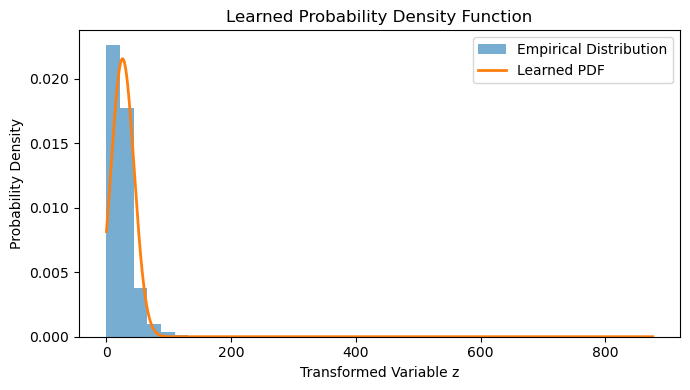

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv", encoding="latin1", low_memory=False)

x = pd.to_numeric(data["no2"], errors="coerce")
x = x.dropna().values

print("Number of valid NO2 samples:", len(x))

r = 102317268

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("a_r =", ar)
print("b_r =", br)

z = x + ar * np.sin(br * x)

mu = np.mean(z)
sigma_squared = np.mean((z - mu) ** 2)

lam = 1 / (2 * sigma_squared)
c = math.sqrt(lam / math.pi)

print("\nLearned Parameters:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)

z_sorted = np.sort(z)
pdf_values = c * np.exp(-lam * (z_sorted - mu) ** 2)

plt.figure(figsize=(7, 4))

plt.hist(z, bins=40, density=True, alpha=0.6, label="Empirical Distribution")

plt.plot(z_sorted, pdf_values, linewidth=2, label="Learned PDF")

plt.xlabel("Transformed Variable z")
plt.ylabel("Probability Density")
plt.title("Learned Probability Density Function")
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
print(c)
print(mu)
print(var)
print(lam)


0.021556324533226836
25.805243726878015


NameError: name 'var' is not defined